## Searching for Zinc Fingers and Domains in UniProt Annotations

This notebook reproduces Fig. S1, S2, and S5

Author: Giulio Tesei

Contact: giulio.tesei@bio.ku.dk

In [3]:
import urllib.parse
import urllib.request
import json
import pandas as pd
import numpy as np
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
from ast import literal_eval
from scipy.stats import binned_statistic, binned_statistic_2d


# function to calculate standard error of the mean
se = lambda x : np.std(x)/np.sqrt(x.size)
se.__name__ = 'SE'

folded_domains = ['C2H2', 'CCHHC', 'GATA', 'EGF-like', 'Fibronectin', 'Ig-like', 'PH',
'Cadherin', 'SH3', 'EF-hand', 'CCHC', 'LDL-receptor', 'SCAN box', 'VWFC',
'Laminin', 'Sushi', 'B30.2/SPRY', 'PID', 'C2', 'Myosin motor', 'Protein kinase'] 

def uniprot_api_features(segment):
    # Use the uniprot as input to fetch the protein name
    uniprot = segment.split('_')[0]
    start_index = int(segment.split('_')[1])
    end_index = int(segment.split('_')[2])
    url_template_uniprot = "https://rest.uniprot.org/uniprotkb/{}.json"
    url_uniprot = url_template_uniprot.format(uniprot)
    folded_counter = np.zeros(end_index-start_index+1)
    folded_counter_all = np.zeros(end_index-start_index+1)

    with urllib.request.urlopen(url_uniprot) as link:
        data_uniprot = json.loads(link.read().decode())
        try:
            features = data_uniprot['features']
        except:
            return np.empty(0),np.empty(0),np.empty(0),0,0
        if len(features) > 0:
            annotations = []
            descriptions = []
            other_descriptions = []
            for feature in features:
                if feature['type'] in ['Domain','Zinc finger']:
                    start_feature = feature['location']['start']['value']
                    end_feature = feature['location']['end']['value']
                    if start_feature == None:
                        length = 0
                    elif end_feature == None:
                        length = 0
                    else:
                        length = end_feature-start_feature
                    if length >= 10:
                        if (start_feature < start_index):
                            start_feature = start_index
                        if (end_feature > end_index):
                            end_feature = end_index
                        length = end_feature-start_feature
                        if length >= 10:
                            folded_counter_all[start_feature-start_index:end_feature-start_index] += 1
                            domain_in_sel = np.any([(fd in feature['description'] and 
                                                    'PHTF' not in feature['description']) 
                                                    for fd in folded_domains])
                            if domain_in_sel or feature['type'] == 'Zinc finger':
                                annotations.append(feature['type'])
                                descriptions.append(feature['description'])
                                if feature['type'] == 'Zinc finger':
                                    descriptions.append('Zinc finger')
                                folded_counter[start_feature-start_index:end_feature-start_index] += 1
                            else:
                                other_descriptions.append(feature['description'])
        return np.unique(annotations),np.unique(descriptions),np.unique(other_descriptions),np.sum(folded_counter!=0),np.sum(folded_counter_all!=0)

In [2]:
# Load IDRome database
df_idrome = pd.read_csv('IDRome_DB.csv',index_col=0)[['nu','UniProt_ID','N']]

In [80]:
for i,name in enumerate(df_idrome.index[:]):
    features, descriptions, other_descriptions, tot_length, tot_length_all = uniprot_api_features(name)
    if features.size>0:
        df_idrome.loc[name,'Features'] = ', '.join(features)
        df_idrome.loc[name,'N_Domain'] = tot_length_all
        df_idrome.loc[name,'Descriptions'] = ', '.join(descriptions)
        df_idrome.loc[name,'Other_Descriptions'] = ', '.join(other_descriptions)
    print(i,end='-')
    time.sleep(.5)

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-72-73-74-75-76-77-78-79-80-81-82-83-84-85-86-87-88-89-90-91-92-93-94-95-96-97-98-99-100-101-102-103-104-105-106-107-108-109-110-111-112-113-114-115-116-117-118-119-120-121-122-123-124-125-126-127-128-129-130-131-132-133-134-135-136-137-138-139-140-141-142-143-144-145-146-147-148-149-150-151-152-153-154-155-156-157-158-159-160-161-162-163-164-165-166-167-168-169-170-171-172-173-174-175-176-177-178-179-180-181-182-183-184-185-186-187-188-189-190-191-192-193-194-195-196-197-198-199-200-201-202-203-204-205-206-207-208-209-210-211-212-213-214-215-216-217-218-219-220-221-222-223-224-225-226-227-228-229-230-231-232-233-234-235-236-237-238-239-240-241-242-243-244-245-246-247-248-249-250-251-252-253-254-255-256-257-258-259-260-261-262-263-264-265-266-267-268-269-270-271-272-273-274-275-276-27

1861-1862-1863-1864-1865-1866-1867-1868-1869-1870-1871-1872-1873-1874-1875-1876-1877-1878-1879-1880-1881-1882-1883-1884-1885-1886-1887-1888-1889-1890-1891-1892-1893-1894-1895-1896-1897-1898-1899-1900-1901-1902-1903-1904-1905-1906-1907-1908-1909-1910-1911-1912-1913-1914-1915-1916-1917-1918-1919-1920-1921-1922-1923-1924-1925-1926-1927-1928-1929-1930-1931-1932-1933-1934-1935-1936-1937-1938-1939-1940-1941-1942-1943-1944-1945-1946-1947-1948-1949-1950-1951-1952-1953-1954-1955-1956-1957-1958-1959-1960-1961-1962-1963-1964-1965-1966-1967-1968-1969-1970-1971-1972-1973-1974-1975-1976-1977-1978-1979-1980-1981-1982-1983-1984-1985-1986-1987-1988-1989-1990-1991-1992-1993-1994-1995-1996-1997-1998-1999-2000-2001-2002-2003-2004-2005-2006-2007-2008-2009-2010-2011-2012-2013-2014-2015-2016-2017-2018-2019-2020-2021-2022-2023-2024-2025-2026-2027-2028-2029-2030-2031-2032-2033-2034-2035-2036-2037-2038-2039-2040-2041-2042-2043-2044-2045-2046-2047-2048-2049-2050-2051-2052-2053-2054-2055-2056-2057-2058-2059-2060-

3500-3501-3502-3503-3504-3505-3506-3507-3508-3509-3510-3511-3512-3513-3514-3515-3516-3517-3518-3519-3520-3521-3522-3523-3524-3525-3526-3527-3528-3529-3530-3531-3532-3533-3534-3535-3536-3537-3538-3539-3540-3541-3542-3543-3544-3545-3546-3547-3548-3549-3550-3551-3552-3553-3554-3555-3556-3557-3558-3559-3560-3561-3562-3563-3564-3565-3566-3567-3568-3569-3570-3571-3572-3573-3574-3575-3576-3577-3578-3579-3580-3581-3582-3583-3584-3585-3586-3587-3588-3589-3590-3591-3592-3593-3594-3595-3596-3597-3598-3599-3600-3601-3602-3603-3604-3605-3606-3607-3608-3609-3610-3611-3612-3613-3614-3615-3616-3617-3618-3619-3620-3621-3622-3623-3624-3625-3626-3627-3628-3629-3630-3631-3632-3633-3634-3635-3636-3637-3638-3639-3640-3641-3642-3643-3644-3645-3646-3647-3648-3649-3650-3651-3652-3653-3654-3655-3656-3657-3658-3659-3660-3661-3662-3663-3664-3665-3666-3667-3668-3669-3670-3671-3672-3673-3674-3675-3676-3677-3678-3679-3680-3681-3682-3683-3684-3685-3686-3687-3688-3689-3690-3691-3692-3693-3694-3695-3696-3697-3698-3699-

5139-5140-5141-5142-5143-5144-5145-5146-5147-5148-5149-5150-5151-5152-5153-5154-5155-5156-5157-5158-5159-5160-5161-5162-5163-5164-5165-5166-5167-5168-5169-5170-5171-5172-5173-5174-5175-5176-5177-5178-5179-5180-5181-5182-5183-5184-5185-5186-5187-5188-5189-5190-5191-5192-5193-5194-5195-5196-5197-5198-5199-5200-5201-5202-5203-5204-5205-5206-5207-5208-5209-5210-5211-5212-5213-5214-5215-5216-5217-5218-5219-5220-5221-5222-5223-5224-5225-5226-5227-5228-5229-5230-5231-5232-5233-5234-5235-5236-5237-5238-5239-5240-5241-5242-5243-5244-5245-5246-5247-5248-5249-5250-5251-5252-5253-5254-5255-5256-5257-5258-5259-5260-5261-5262-5263-5264-5265-5266-5267-5268-5269-5270-5271-5272-5273-5274-5275-5276-5277-5278-5279-5280-5281-5282-5283-5284-5285-5286-5287-5288-5289-5290-5291-5292-5293-5294-5295-5296-5297-5298-5299-5300-5301-5302-5303-5304-5305-5306-5307-5308-5309-5310-5311-5312-5313-5314-5315-5316-5317-5318-5319-5320-5321-5322-5323-5324-5325-5326-5327-5328-5329-5330-5331-5332-5333-5334-5335-5336-5337-5338-

6778-6779-6780-6781-6782-6783-6784-6785-6786-6787-6788-6789-6790-6791-6792-6793-6794-6795-6796-6797-6798-6799-6800-6801-6802-6803-6804-6805-6806-6807-6808-6809-6810-6811-6812-6813-6814-6815-6816-6817-6818-6819-6820-6821-6822-6823-6824-6825-6826-6827-6828-6829-6830-6831-6832-6833-6834-6835-6836-6837-6838-6839-6840-6841-6842-6843-6844-6845-6846-6847-6848-6849-6850-6851-6852-6853-6854-6855-6856-6857-6858-6859-6860-6861-6862-6863-6864-6865-6866-6867-6868-6869-6870-6871-6872-6873-6874-6875-6876-6877-6878-6879-6880-6881-6882-6883-6884-6885-6886-6887-6888-6889-6890-6891-6892-6893-6894-6895-6896-6897-6898-6899-6900-6901-6902-6903-6904-6905-6906-6907-6908-6909-6910-6911-6912-6913-6914-6915-6916-6917-6918-6919-6920-6921-6922-6923-6924-6925-6926-6927-6928-6929-6930-6931-6932-6933-6934-6935-6936-6937-6938-6939-6940-6941-6942-6943-6944-6945-6946-6947-6948-6949-6950-6951-6952-6953-6954-6955-6956-6957-6958-6959-6960-6961-6962-6963-6964-6965-6966-6967-6968-6969-6970-6971-6972-6973-6974-6975-6976-6977-

8417-8418-8419-8420-8421-8422-8423-8424-8425-8426-8427-8428-8429-8430-8431-8432-8433-8434-8435-8436-8437-8438-8439-8440-8441-8442-8443-8444-8445-8446-8447-8448-8449-8450-8451-8452-8453-8454-8455-8456-8457-8458-8459-8460-8461-8462-8463-8464-8465-8466-8467-8468-8469-8470-8471-8472-8473-8474-8475-8476-8477-8478-8479-8480-8481-8482-8483-8484-8485-8486-8487-8488-8489-8490-8491-8492-8493-8494-8495-8496-8497-8498-8499-8500-8501-8502-8503-8504-8505-8506-8507-8508-8509-8510-8511-8512-8513-8514-8515-8516-8517-8518-8519-8520-8521-8522-8523-8524-8525-8526-8527-8528-8529-8530-8531-8532-8533-8534-8535-8536-8537-8538-8539-8540-8541-8542-8543-8544-8545-8546-8547-8548-8549-8550-8551-8552-8553-8554-8555-8556-8557-8558-8559-8560-8561-8562-8563-8564-8565-8566-8567-8568-8569-8570-8571-8572-8573-8574-8575-8576-8577-8578-8579-8580-8581-8582-8583-8584-8585-8586-8587-8588-8589-8590-8591-8592-8593-8594-8595-8596-8597-8598-8599-8600-8601-8602-8603-8604-8605-8606-8607-8608-8609-8610-8611-8612-8613-8614-8615-8616-

10047-10048-10049-10050-10051-10052-10053-10054-10055-10056-10057-10058-10059-10060-10061-10062-10063-10064-10065-10066-10067-10068-10069-10070-10071-10072-10073-10074-10075-10076-10077-10078-10079-10080-10081-10082-10083-10084-10085-10086-10087-10088-10089-10090-10091-10092-10093-10094-10095-10096-10097-10098-10099-10100-10101-10102-10103-10104-10105-10106-10107-10108-10109-10110-10111-10112-10113-10114-10115-10116-10117-10118-10119-10120-10121-10122-10123-10124-10125-10126-10127-10128-10129-10130-10131-10132-10133-10134-10135-10136-10137-10138-10139-10140-10141-10142-10143-10144-10145-10146-10147-10148-10149-10150-10151-10152-10153-10154-10155-10156-10157-10158-10159-10160-10161-10162-10163-10164-10165-10166-10167-10168-10169-10170-10171-10172-10173-10174-10175-10176-10177-10178-10179-10180-10181-10182-10183-10184-10185-10186-10187-10188-10189-10190-10191-10192-10193-10194-10195-10196-10197-10198-10199-10200-10201-10202-10203-10204-10205-10206-10207-10208-10209-10210-10211-10212-1021

11413-11414-11415-11416-11417-11418-11419-11420-11421-11422-11423-11424-11425-11426-11427-11428-11429-11430-11431-11432-11433-11434-11435-11436-11437-11438-11439-11440-11441-11442-11443-11444-11445-11446-11447-11448-11449-11450-11451-11452-11453-11454-11455-11456-11457-11458-11459-11460-11461-11462-11463-11464-11465-11466-11467-11468-11469-11470-11471-11472-11473-11474-11475-11476-11477-11478-11479-11480-11481-11482-11483-11484-11485-11486-11487-11488-11489-11490-11491-11492-11493-11494-11495-11496-11497-11498-11499-11500-11501-11502-11503-11504-11505-11506-11507-11508-11509-11510-11511-11512-11513-11514-11515-11516-11517-11518-11519-11520-11521-11522-11523-11524-11525-11526-11527-11528-11529-11530-11531-11532-11533-11534-11535-11536-11537-11538-11539-11540-11541-11542-11543-11544-11545-11546-11547-11548-11549-11550-11551-11552-11553-11554-11555-11556-11557-11558-11559-11560-11561-11562-11563-11564-11565-11566-11567-11568-11569-11570-11571-11572-11573-11574-11575-11576-11577-11578-1157

12779-12780-12781-12782-12783-12784-12785-12786-12787-12788-12789-12790-12791-12792-12793-12794-12795-12796-12797-12798-12799-12800-12801-12802-12803-12804-12805-12806-12807-12808-12809-12810-12811-12812-12813-12814-12815-12816-12817-12818-12819-12820-12821-12822-12823-12824-12825-12826-12827-12828-12829-12830-12831-12832-12833-12834-12835-12836-12837-12838-12839-12840-12841-12842-12843-12844-12845-12846-12847-12848-12849-12850-12851-12852-12853-12854-12855-12856-12857-12858-12859-12860-12861-12862-12863-12864-12865-12866-12867-12868-12869-12870-12871-12872-12873-12874-12875-12876-12877-12878-12879-12880-12881-12882-12883-12884-12885-12886-12887-12888-12889-12890-12891-12892-12893-12894-12895-12896-12897-12898-12899-12900-12901-12902-12903-12904-12905-12906-12907-12908-12909-12910-12911-12912-12913-12914-12915-12916-12917-12918-12919-12920-12921-12922-12923-12924-12925-12926-12927-12928-12929-12930-12931-12932-12933-12934-12935-12936-12937-12938-12939-12940-12941-12942-12943-12944-1294

14145-14146-14147-14148-14149-14150-14151-14152-14153-14154-14155-14156-14157-14158-14159-14160-14161-14162-14163-14164-14165-14166-14167-14168-14169-14170-14171-14172-14173-14174-14175-14176-14177-14178-14179-14180-14181-14182-14183-14184-14185-14186-14187-14188-14189-14190-14191-14192-14193-14194-14195-14196-14197-14198-14199-14200-14201-14202-14203-14204-14205-14206-14207-14208-14209-14210-14211-14212-14213-14214-14215-14216-14217-14218-14219-14220-14221-14222-14223-14224-14225-14226-14227-14228-14229-14230-14231-14232-14233-14234-14235-14236-14237-14238-14239-14240-14241-14242-14243-14244-14245-14246-14247-14248-14249-14250-14251-14252-14253-14254-14255-14256-14257-14258-14259-14260-14261-14262-14263-14264-14265-14266-14267-14268-14269-14270-14271-14272-14273-14274-14275-14276-14277-14278-14279-14280-14281-14282-14283-14284-14285-14286-14287-14288-14289-14290-14291-14292-14293-14294-14295-14296-14297-14298-14299-14300-14301-14302-14303-14304-14305-14306-14307-14308-14309-14310-1431

15511-15512-15513-15514-15515-15516-15517-15518-15519-15520-15521-15522-15523-15524-15525-15526-15527-15528-15529-15530-15531-15532-15533-15534-15535-15536-15537-15538-15539-15540-15541-15542-15543-15544-15545-15546-15547-15548-15549-15550-15551-15552-15553-15554-15555-15556-15557-15558-15559-15560-15561-15562-15563-15564-15565-15566-15567-15568-15569-15570-15571-15572-15573-15574-15575-15576-15577-15578-15579-15580-15581-15582-15583-15584-15585-15586-15587-15588-15589-15590-15591-15592-15593-15594-15595-15596-15597-15598-15599-15600-15601-15602-15603-15604-15605-15606-15607-15608-15609-15610-15611-15612-15613-15614-15615-15616-15617-15618-15619-15620-15621-15622-15623-15624-15625-15626-15627-15628-15629-15630-15631-15632-15633-15634-15635-15636-15637-15638-15639-15640-15641-15642-15643-15644-15645-15646-15647-15648-15649-15650-15651-15652-15653-15654-15655-15656-15657-15658-15659-15660-15661-15662-15663-15664-15665-15666-15667-15668-15669-15670-15671-15672-15673-15674-15675-15676-1567

16877-16878-16879-16880-16881-16882-16883-16884-16885-16886-16887-16888-16889-16890-16891-16892-16893-16894-16895-16896-16897-16898-16899-16900-16901-16902-16903-16904-16905-16906-16907-16908-16909-16910-16911-16912-16913-16914-16915-16916-16917-16918-16919-16920-16921-16922-16923-16924-16925-16926-16927-16928-16929-16930-16931-16932-16933-16934-16935-16936-16937-16938-16939-16940-16941-16942-16943-16944-16945-16946-16947-16948-16949-16950-16951-16952-16953-16954-16955-16956-16957-16958-16959-16960-16961-16962-16963-16964-16965-16966-16967-16968-16969-16970-16971-16972-16973-16974-16975-16976-16977-16978-16979-16980-16981-16982-16983-16984-16985-16986-16987-16988-16989-16990-16991-16992-16993-16994-16995-16996-16997-16998-16999-17000-17001-17002-17003-17004-17005-17006-17007-17008-17009-17010-17011-17012-17013-17014-17015-17016-17017-17018-17019-17020-17021-17022-17023-17024-17025-17026-17027-17028-17029-17030-17031-17032-17033-17034-17035-17036-17037-17038-17039-17040-17041-17042-1704

18243-18244-18245-18246-18247-18248-18249-18250-18251-18252-18253-18254-18255-18256-18257-18258-18259-18260-18261-18262-18263-18264-18265-18266-18267-18268-18269-18270-18271-18272-18273-18274-18275-18276-18277-18278-18279-18280-18281-18282-18283-18284-18285-18286-18287-18288-18289-18290-18291-18292-18293-18294-18295-18296-18297-18298-18299-18300-18301-18302-18303-18304-18305-18306-18307-18308-18309-18310-18311-18312-18313-18314-18315-18316-18317-18318-18319-18320-18321-18322-18323-18324-18325-18326-18327-18328-18329-18330-18331-18332-18333-18334-18335-18336-18337-18338-18339-18340-18341-18342-18343-18344-18345-18346-18347-18348-18349-18350-18351-18352-18353-18354-18355-18356-18357-18358-18359-18360-18361-18362-18363-18364-18365-18366-18367-18368-18369-18370-18371-18372-18373-18374-18375-18376-18377-18378-18379-18380-18381-18382-18383-18384-18385-18386-18387-18388-18389-18390-18391-18392-18393-18394-18395-18396-18397-18398-18399-18400-18401-18402-18403-18404-18405-18406-18407-18408-1840

19609-19610-19611-19612-19613-19614-19615-19616-19617-19618-19619-19620-19621-19622-19623-19624-19625-19626-19627-19628-19629-19630-19631-19632-19633-19634-19635-19636-19637-19638-19639-19640-19641-19642-19643-19644-19645-19646-19647-19648-19649-19650-19651-19652-19653-19654-19655-19656-19657-19658-19659-19660-19661-19662-19663-19664-19665-19666-19667-19668-19669-19670-19671-19672-19673-19674-19675-19676-19677-19678-19679-19680-19681-19682-19683-19684-19685-19686-19687-19688-19689-19690-19691-19692-19693-19694-19695-19696-19697-19698-19699-19700-19701-19702-19703-19704-19705-19706-19707-19708-19709-19710-19711-19712-19713-19714-19715-19716-19717-19718-19719-19720-19721-19722-19723-19724-19725-19726-19727-19728-19729-19730-19731-19732-19733-19734-19735-19736-19737-19738-19739-19740-19741-19742-19743-19744-19745-19746-19747-19748-19749-19750-19751-19752-19753-19754-19755-19756-19757-19758-19759-19760-19761-19762-19763-19764-19765-19766-19767-19768-19769-19770-19771-19772-19773-19774-1977

20975-20976-20977-20978-20979-20980-20981-20982-20983-20984-20985-20986-20987-20988-20989-20990-20991-20992-20993-20994-20995-20996-20997-20998-20999-21000-21001-21002-21003-21004-21005-21006-21007-21008-21009-21010-21011-21012-21013-21014-21015-21016-21017-21018-21019-21020-21021-21022-21023-21024-21025-21026-21027-21028-21029-21030-21031-21032-21033-21034-21035-21036-21037-21038-21039-21040-21041-21042-21043-21044-21045-21046-21047-21048-21049-21050-21051-21052-21053-21054-21055-21056-21057-21058-21059-21060-21061-21062-21063-21064-21065-21066-21067-21068-21069-21070-21071-21072-21073-21074-21075-21076-21077-21078-21079-21080-21081-21082-21083-21084-21085-21086-21087-21088-21089-21090-21091-21092-21093-21094-21095-21096-21097-21098-21099-21100-21101-21102-21103-21104-21105-21106-21107-21108-21109-21110-21111-21112-21113-21114-21115-21116-21117-21118-21119-21120-21121-21122-21123-21124-21125-21126-21127-21128-21129-21130-21131-21132-21133-21134-21135-21136-21137-21138-21139-21140-2114

22341-22342-22343-22344-22345-22346-22347-22348-22349-22350-22351-22352-22353-22354-22355-22356-22357-22358-22359-22360-22361-22362-22363-22364-22365-22366-22367-22368-22369-22370-22371-22372-22373-22374-22375-22376-22377-22378-22379-22380-22381-22382-22383-22384-22385-22386-22387-22388-22389-22390-22391-22392-22393-22394-22395-22396-22397-22398-22399-22400-22401-22402-22403-22404-22405-22406-22407-22408-22409-22410-22411-22412-22413-22414-22415-22416-22417-22418-22419-22420-22421-22422-22423-22424-22425-22426-22427-22428-22429-22430-22431-22432-22433-22434-22435-22436-22437-22438-22439-22440-22441-22442-22443-22444-22445-22446-22447-22448-22449-22450-22451-22452-22453-22454-22455-22456-22457-22458-22459-22460-22461-22462-22463-22464-22465-22466-22467-22468-22469-22470-22471-22472-22473-22474-22475-22476-22477-22478-22479-22480-22481-22482-22483-22484-22485-22486-22487-22488-22489-22490-22491-22492-22493-22494-22495-22496-22497-22498-22499-22500-22501-22502-22503-22504-22505-22506-2250

23707-23708-23709-23710-23711-23712-23713-23714-23715-23716-23717-23718-23719-23720-23721-23722-23723-23724-23725-23726-23727-23728-23729-23730-23731-23732-23733-23734-23735-23736-23737-23738-23739-23740-23741-23742-23743-23744-23745-23746-23747-23748-23749-23750-23751-23752-23753-23754-23755-23756-23757-23758-23759-23760-23761-23762-23763-23764-23765-23766-23767-23768-23769-23770-23771-23772-23773-23774-23775-23776-23777-23778-23779-23780-23781-23782-23783-23784-23785-23786-23787-23788-23789-23790-23791-23792-23793-23794-23795-23796-23797-23798-23799-23800-23801-23802-23803-23804-23805-23806-23807-23808-23809-23810-23811-23812-23813-23814-23815-23816-23817-23818-23819-23820-23821-23822-23823-23824-23825-23826-23827-23828-23829-23830-23831-23832-23833-23834-23835-23836-23837-23838-23839-23840-23841-23842-23843-23844-23845-23846-23847-23848-23849-23850-23851-23852-23853-23854-23855-23856-23857-23858-23859-23860-23861-23862-23863-23864-23865-23866-23867-23868-23869-23870-23871-23872-2387

25073-25074-25075-25076-25077-25078-25079-25080-25081-25082-25083-25084-25085-25086-25087-25088-25089-25090-25091-25092-25093-25094-25095-25096-25097-25098-25099-25100-25101-25102-25103-25104-25105-25106-25107-25108-25109-25110-25111-25112-25113-25114-25115-25116-25117-25118-25119-25120-25121-25122-25123-25124-25125-25126-25127-25128-25129-25130-25131-25132-25133-25134-25135-25136-25137-25138-25139-25140-25141-25142-25143-25144-25145-25146-25147-25148-25149-25150-25151-25152-25153-25154-25155-25156-25157-25158-25159-25160-25161-25162-25163-25164-25165-25166-25167-25168-25169-25170-25171-25172-25173-25174-25175-25176-25177-25178-25179-25180-25181-25182-25183-25184-25185-25186-25187-25188-25189-25190-25191-25192-25193-25194-25195-25196-25197-25198-25199-25200-25201-25202-25203-25204-25205-25206-25207-25208-25209-25210-25211-25212-25213-25214-25215-25216-25217-25218-25219-25220-25221-25222-25223-25224-25225-25226-25227-25228-25229-25230-25231-25232-25233-25234-25235-25236-25237-25238-2523

26439-26440-26441-26442-26443-26444-26445-26446-26447-26448-26449-26450-26451-26452-26453-26454-26455-26456-26457-26458-26459-26460-26461-26462-26463-26464-26465-26466-26467-26468-26469-26470-26471-26472-26473-26474-26475-26476-26477-26478-26479-26480-26481-26482-26483-26484-26485-26486-26487-26488-26489-26490-26491-26492-26493-26494-26495-26496-26497-26498-26499-26500-26501-26502-26503-26504-26505-26506-26507-26508-26509-26510-26511-26512-26513-26514-26515-26516-26517-26518-26519-26520-26521-26522-26523-26524-26525-26526-26527-26528-26529-26530-26531-26532-26533-26534-26535-26536-26537-26538-26539-26540-26541-26542-26543-26544-26545-26546-26547-26548-26549-26550-26551-26552-26553-26554-26555-26556-26557-26558-26559-26560-26561-26562-26563-26564-26565-26566-26567-26568-26569-26570-26571-26572-26573-26574-26575-26576-26577-26578-26579-26580-26581-26582-26583-26584-26585-26586-26587-26588-26589-26590-26591-26592-26593-26594-26595-26596-26597-26598-26599-26600-26601-26602-26603-26604-2660

27805-27806-27807-27808-27809-27810-27811-27812-27813-27814-27815-27816-27817-27818-27819-27820-27821-27822-27823-27824-27825-27826-27827-27828-27829-27830-27831-27832-27833-27834-27835-27836-27837-27838-27839-27840-27841-27842-27843-27844-27845-27846-27847-27848-27849-27850-27851-27852-27853-27854-27855-27856-27857-27858-27859-27860-27861-27862-27863-27864-27865-27866-27867-27868-27869-27870-27871-27872-27873-27874-27875-27876-27877-27878-27879-27880-27881-27882-27883-27884-27885-27886-27887-27888-27889-27890-27891-27892-27893-27894-27895-27896-27897-27898-27899-27900-27901-27902-27903-27904-27905-27906-27907-27908-27909-27910-27911-27912-27913-27914-27915-27916-27917-27918-27919-27920-27921-27922-27923-27924-27925-27926-27927-27928-27929-27930-27931-27932-27933-27934-27935-27936-27937-27938-27939-27940-27941-27942-27943-27944-27945-27946-27947-27948-27949-27950-27951-27952-27953-27954-27955-27956-27957-27958-27959-27960-27961-27962-27963-27964-27965-27966-27967-27968-27969-27970-2797

29171-29172-29173-29174-29175-29176-29177-29178-29179-29180-29181-29182-29183-29184-29185-29186-29187-29188-29189-29190-29191-29192-29193-29194-29195-29196-29197-29198-29199-29200-29201-29202-29203-29204-29205-29206-29207-29208-29209-29210-29211-29212-29213-29214-29215-29216-29217-29218-29219-29220-29221-29222-29223-29224-29225-29226-29227-29228-29229-29230-29231-29232-29233-29234-29235-29236-29237-29238-29239-29240-29241-29242-29243-29244-29245-29246-29247-29248-29249-29250-29251-29252-29253-29254-29255-29256-29257-29258-29259-29260-29261-29262-29263-29264-29265-29266-29267-29268-29269-29270-29271-29272-29273-29274-29275-29276-29277-29278-29279-29280-29281-29282-29283-29284-29285-29286-29287-29288-29289-29290-29291-29292-29293-29294-29295-29296-29297-29298-29299-29300-29301-29302-29303-29304-29305-29306-29307-29308-29309-29310-29311-29312-29313-29314-29315-29316-29317-29318-29319-29320-29321-29322-29323-29324-29325-29326-29327-29328-29329-29330-29331-29332-29333-29334-29335-29336-2933

In [81]:
df_idrome['N_Domain'] = df_idrome['N_Domain'].fillna(0) 
df_idrome['fdomain'] = df_idrome['N_Domain'] / df_idrome['N']
df_idrome.to_csv('IDRome_DB_Domains.csv')

In [10]:
# Load domain annotations
df_idrome = pd.read_csv('IDRome_DB_Domains.csv',index_col=0)

In [434]:
curated = df_idrome[~df_idrome.Descriptions.isnull()].Descriptions.apply(lambda x : x.split(','))

In [436]:
other = df_idrome[~df_idrome.Other_Descriptions.isnull()].Other_Descriptions.apply(lambda x : x.split(','))

#### Rename Domains with Shorthand Descriptions

In [426]:
def replace_w_substring(strings):
    strings = strings.split(', ')
    shorthand_description = ['C2', 'Zinc finger', 'EGF-like', 'Fibronectin', 'Ig-like', 'PH',
'Cadherin', 'SH3', 'EF-hand', 'LDL-receptor', 'SCAN box', 'VWFC',
'Laminin', 'Sushi', 'B30.2/SPRY', 'PID', 'Myosin motor', 'Protein kinase'] + other_short
    for i,string in enumerate(strings):
        for substring in shorthand_description:
            if substring in string:
                strings[i] = substring
    if 'Zinc finger' in strings:
        strings = ['Zinc finger']
    return np.unique(strings)

def replace_w_substring_other(strings):
    strings = strings.split(', ')
    shorthand_description = ['Antistasin', 'FAS1', 'FZ', 'Follistatin', 'KRAB', 'Kazal', 
'MAM', 'NIDO', 'SEA', 'SRCR', 'TB' ,'TIL', 'TSP', 'BTB', 'Bromo', 'CTCK', 'CUB', 'Collagen', 
'DHHC', 'DSL', 'ELM2', 'EMI', 'F5/8', 'GPS', 'IQ', 'LRRCT', 
'PDZ', 'Ras-GEF', 'Rho-GAP', 'RhoBD', 'SAM', 'SET', 'SH2', 'SMP-LBD', 'VWFD', 'WH2']
    for i,string in enumerate(strings):
        for substring in shorthand_description:
            if substring in string:
                strings[i] = substring
    if 'Zinc finger' in strings:
        strings = ['Zinc finger']
    return np.unique(strings)

df_idrome['Short_Descriptions'] = df_idrome[~pd.isnull(df_idrome.Descriptions)].Descriptions.apply(
    lambda x : replace_w_substring(x))
df_idrome['Other_Short_Descriptions'] = df_idrome[~pd.isnull(df_idrome.Other_Descriptions)].Other_Descriptions.apply(
    lambda x : replace_w_substring_other(x))

#### Descriptions for IDRs with Multiple Domains of Different Type

In [427]:
df_idrome['Short_Descriptions'] = df_idrome[~pd.isnull(df_idrome.Descriptions)].Short_Descriptions.apply(
    lambda x : ' & '.join([str(s) for s in x]))
df_idrome['Other_Short_Descriptions'] = df_idrome[~pd.isnull(
    df_idrome.Other_Descriptions)].Other_Short_Descriptions.apply(
    lambda x : ' & '.join([str(s) for s in x]))

In [428]:
df_idrome['All_Short'] = df_idrome[['Short_Descriptions','Other_Short_Descriptions']].values.tolist()
df_idrome.query('fdomain > 0').All_Short

seq_name
A0A0J9YWL9_573_993       [Zinc finger, nan]
A0A0J9YY54_433_714       [Zinc finger, nan]
A0AVI2_121_328                    [C2, nan]
A0AVI2_1336_1400                  [C2, nan]
A0AVI2_952_1072                   [C2, nan]
                              ...          
Q9Y6K9_355_400           [Zinc finger, nan]
Q9Y6R6_785_833           [Zinc finger, nan]
Q9Y6S9_230_386        [Protein kinase, nan]
Q9Y6X6_951_1018         [Myosin motor, nan]
Q9Y6X8_1_89              [Zinc finger, nan]
Name: All_Short, Length: 1837, dtype: object

In [429]:
df_idrome['All_Short'] = df_idrome['All_Short'].apply(
    lambda x : [s for s in x if str(s) != 'nan'])

In [430]:
df_idrome['All_Short'] = df_idrome['All_Short'].apply(
    lambda x : ' & '.join([str(s) for s in x]) if type(x) == list else x)

#### Fig. S1

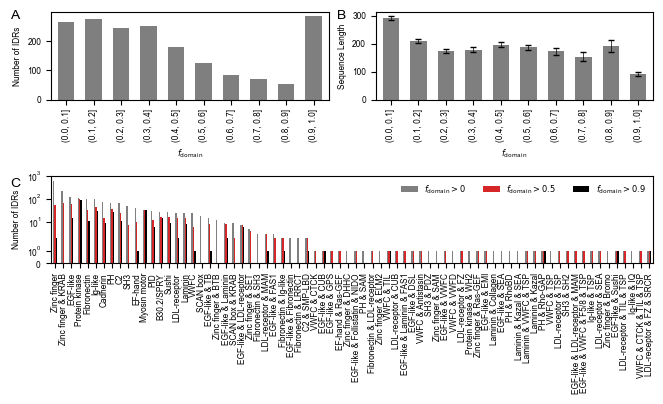

In [389]:
fig = plt.figure(figsize=(6.6,4))
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 6})

ax1 = plt.subplot2grid( (2,2), (0,0), rowspan=1, colspan=1 )
ax2 = plt.subplot2grid( (2,2), (0,1), rowspan=1, colspan=1 )
ax3 = plt.subplot2grid( (2,2), (1,0), rowspan=1, colspan=2 )

intervals = pd.cut(df_idrome['fdomain'], np.arange(0, 1.05, .1))
df_idrome['fdomain'].groupby(intervals).agg(['count']).plot(rot=90, ax=ax1, kind='bar', 
                      color='tab:gray',width=.6,legend=False)

ax1.set_ylabel('Number of IDRs')

mean_se = df_idrome['N'].groupby(intervals).agg(['mean',se])
mean_se['mean'].plot(rot=90, ax=ax2, kind='bar', yerr=mean_se['SE'],color='tab:gray',
                      error_kw=dict(ecolor='black',elinewidth=0.5,capsize=2),width=.6)

ax2.set_ylabel('Sequence Length')
ax1.set_xlabel(r'$f_{\mathrm{domain}}$')
ax2.set_xlabel(r'$f_{\mathrm{domain}}$')

counts = pd.DataFrame(columns=['$f_{\mathrm{domain}}>0$','$f_{\mathrm{domain}}>0.5$','$f_{\mathrm{domain}}>0.9$'])
counts['$f_{\mathrm{domain}}>0$'] = df_idrome.query('fdomain>0').All_Short.value_counts()
counts['$f_{\mathrm{domain}}>0.5$'] = df_idrome.query('fdomain>0.5').All_Short.value_counts()
counts['$f_{\mathrm{domain}}>0.9$'] = df_idrome.query('fdomain>0.9').All_Short.value_counts()
#counts = counts[counts>=20]
counts.index
counts.plot.bar(ax=ax3,color=['tab:gray','tab:red','k'])

ax3.set_ylabel('Number of IDRs')
ax3.set_yscale('symlog')
ax3.set_ylim(0,1000)

ax3.legend(frameon=False,ncol=3)

fig.text(0.01, .96, 'A', fontsize=10)
fig.text(0.01, .54, 'C', fontsize=10)
fig.text(0.506, .96, 'B', fontsize=10)

plt.tight_layout()

fig.savefig('figs/figS1.pdf',dpi=300)

#### Calculate Average pLDDT Scores

In [12]:
pLDDT = pd.read_csv('idr_selection/idr_pLDDT.csv.gz',header=0,sep=';')
pLDDT.sort_values('uniprot',inplace=True)
pLDDT['seq_name'] = pLDDT.uniprot+'_'+pLDDT['first'].apply(
    lambda x : '{:g}'.format(x))+'_'+pLDDT['last'].apply(lambda x : '{:g}'.format(x))
pLDDT['pLDDT_w20'] = pLDDT['pLDDT_w20'].apply(lambda x : 100*np.array(eval(x.replace(':',','))))
pLDDT['pLDDT_mean'] = pLDDT['pLDDT_w20'].apply(np.mean)
pLDDT.set_index('seq_name',inplace=True)
df_idrome['pLDDT'] = pLDDT['pLDDT_w20'].apply(np.mean)

#### Fig. S2

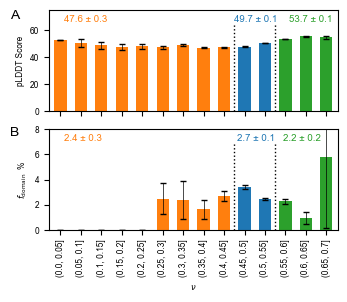

In [13]:
fig, (ax1,ax2) = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(3.4,3))
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 6})

# bin nu values
nu_intervals = pd.cut(df_idrome['nu'],  np.arange(0, .71, .05))

ax1.set_xlim(3.5,13.5)

ax1.vlines([8.5,10.5],ymin=0,ymax=65,color='k',ls=':',lw=1)
ax1.set_ylim(0,75)

intervals = pd.cut(df_idrome['nu'], np.arange(0, .71, .05))
mean_se = df_idrome['pLDDT'].groupby(intervals).agg(['mean',se])
mean_se['mean'].plot(rot=90, ax=ax1, kind='bar', yerr=mean_se['SE'],
                      error_kw=dict(ecolor='black',elinewidth=0.5,capsize=2),
                      color=['tab:orange']*9+['tab:blue']*2+['tab:green']*3,width=.6)

intervals = pd.cut(df_idrome['nu'], np.array([0, .45, .55, .7]))
mean_se = df_idrome['pLDDT'].groupby(intervals).agg(['mean',se])

n_compact = mean_se.iloc[0]['mean']
n_theta = mean_se.iloc[1]['mean']
n_expanded = mean_se.iloc[-1]['mean']
n_compact_e = mean_se.iloc[0]['SE']
n_theta_e = mean_se.iloc[1]['SE']
n_expanded_e = mean_se.iloc[-1]['SE']

ax1.annotate(f'{n_compact:.1f} ± {n_compact_e:.1f}',xy=(.05,.88),
            xycoords='axes fraction',color='tab:orange',fontsize=7)
ax1.annotate(f'{n_theta:.1f} ± {n_theta_e:.1f}',xy=(.64,.88),
            xycoords='axes fraction',color='tab:blue',fontsize=7)
ax1.annotate(f'{n_expanded:.1f} ± {n_expanded_e:.1f}',xy=(.83,.88),
            xycoords='axes fraction',color='tab:green',fontsize=7)

ax1.set_ylabel(r'pLDDT Score')

##################

# bin nu values
nu_intervals = pd.cut(df_idrome['nu'],  np.arange(0, .71, .05))

ax2.set_xlim(3.5,13.5)

ax2.vlines([8.5,10.5],ymin=0,ymax=7,color='k',ls=':',lw=1)
ax2.set_ylim(0,8)

intervals = pd.cut(df_idrome['nu'], np.arange(0, .71, .05))
mean_se = df_idrome['fdomain'].groupby(intervals).agg(['mean',se])*100
mean_se['mean'].plot(rot=90, ax=ax2, kind='bar', yerr=mean_se['SE'],
                      error_kw=dict(ecolor='black',elinewidth=0.5,capsize=2),
                      color=['tab:orange']*9+['tab:blue']*2+['tab:green']*3,width=.6)

intervals = pd.cut(df_idrome['nu'], np.array([0, .45, .55, .7]))
mean_se = df_idrome['fdomain'].groupby(intervals).agg(['mean',se])*100

n_compact = mean_se.iloc[0]['mean']
n_theta = mean_se.iloc[1]['mean']
n_expanded = mean_se.iloc[-1]['mean']
n_compact_e = mean_se.iloc[0]['SE']
n_theta_e = mean_se.iloc[1]['SE']
n_expanded_e = mean_se.iloc[-1]['SE']

ax2.annotate(f'{n_compact:.1f} ± {n_compact_e:.1f}',xy=(.05,.88),
            xycoords='axes fraction',color='tab:orange',fontsize=7)
ax2.annotate(f'{n_theta:.1f} ± {n_theta_e:.1f}',xy=(.651,.88),
            xycoords='axes fraction',color='tab:blue',fontsize=7)
ax2.annotate(f'{n_expanded:.1f} ± {n_expanded_e:.1f}',xy=(.81,.88),
            xycoords='axes fraction',color='tab:green',fontsize=7)

ax2.set_ylabel(r'$f_{\mathrm{domain}}$  %')
ax2.set_xlabel(r'$\nu$')

fig.text(0.01, .94, 'A', fontsize=10)
fig.text(0.01, .55, 'B', fontsize=10)

plt.tight_layout()
fig.savefig('figs/figS2.pdf')

#### Fig. S5

In [16]:
qcdpred = pd.read_csv('QCDPred/idr_qcdpred2.csv.gz',header=0,sep=',',index_col='name')
qcdpred['QCDpred2'] = qcdpred['QCDpred2'].apply(lambda x : np.array(eval(x.replace(':',','))).astype(float))
df_idrome['QCDpred'] = qcdpred['QCDmean2'] 

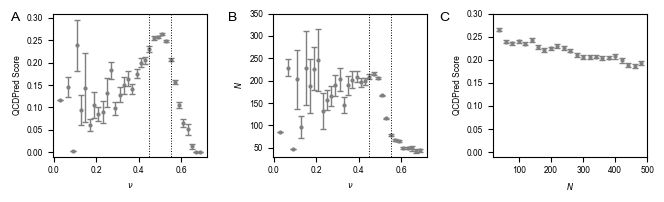

In [17]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(6.6,2))
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 6})

bins = np.arange(0, .701, .02)
x = bins[:-1]+.01

average = binned_statistic(df_idrome.nu,df_idrome['QCDpred'],bins=bins)[0]
standard_error = binned_statistic(df_idrome.nu,df_idrome['QCDpred'],statistic=se,
                                     bins=bins)[0]

ax1.errorbar(x,average,yerr=standard_error,ms=2,marker='o',lw=0,zorder=0,
             elinewidth=1,capsize=2,capthick=1,color='tab:gray')

average = binned_statistic(df_idrome.nu,df_idrome['N'],bins=bins)[0]
standard_error = binned_statistic(df_idrome.nu,df_idrome['N'],statistic=se,
                                     bins=bins)[0]

ax2.errorbar(x,average,yerr=standard_error,ms=2,marker='o',lw=0,zorder=0,
             elinewidth=1,capsize=2,capthick=1,color='tab:gray')

bins = np.arange(30, 500, 20)
x = bins[:-1]+10

average = binned_statistic(df_idrome.N,df_idrome['QCDpred'],bins=bins)[0]
standard_error = binned_statistic(df_idrome.N,df_idrome['QCDpred'],statistic=se,
                                     bins=bins)[0]

ax3.errorbar(x,average,yerr=standard_error,ms=2,marker='o',lw=0,zorder=0,
             elinewidth=1,capsize=2,capthick=1,color='tab:gray')

ax1.set_ylabel('QCDPred Score')
ax1.set_xlabel('$\\nu$')
ax1.vlines([.45,.55],ymin=-10,ymax=50,color='k',ls=':',lw=.7)
ax1.set_ylim(-.01,.31)

ax2.set_ylabel('$N$')
ax2.set_xlabel('$\\nu$')
ax2.vlines([.45,.55],ymin=-100,ymax=350,color='k',ls=':',lw=.7)
ax2.set_ylim(30,350)

ax3.set_xlim(20,500)
ax3.set_ylim(-.01,.3)
ax3.set_ylabel('QCDPred Score')
ax3.set_xlabel('$N$')

f.text(0.01, .9, 'A', fontsize=10)
f.text(0.34, .9, 'B', fontsize=10)
f.text(0.66, .9, 'C', fontsize=10)

plt.tight_layout(w_pad=3)

f.savefig('figs/figS5.pdf',dpi=300)

#### Save fraction of domains in main database

In [409]:
df_domains = pd.read_csv('IDRome_DB_Domains.csv',index_col=0)
df_idrome = pd.read_csv('IDRome_DB.csv',index_col=0)
df_idrome['fdomain'] = df_domains['fdomain']
df_idrome.to_csv('IDRome_DB.csv')